<h1 style="text-align: center;">Marketing Campaigns</h1>

**Author**: Dhayanandan Thangathurai  
**Date**: 14-DEC-2024 

## Problem scenario:
Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.
## Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

## Data description:
The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.

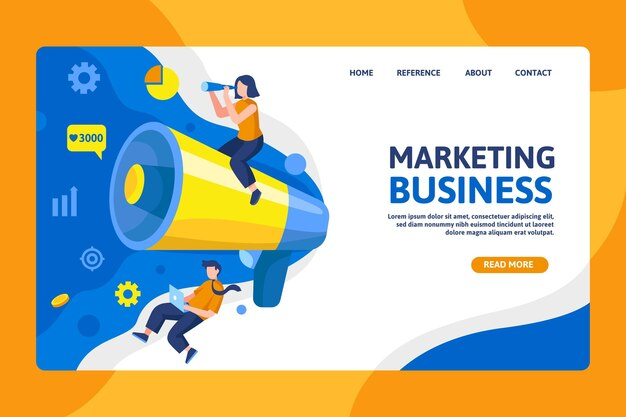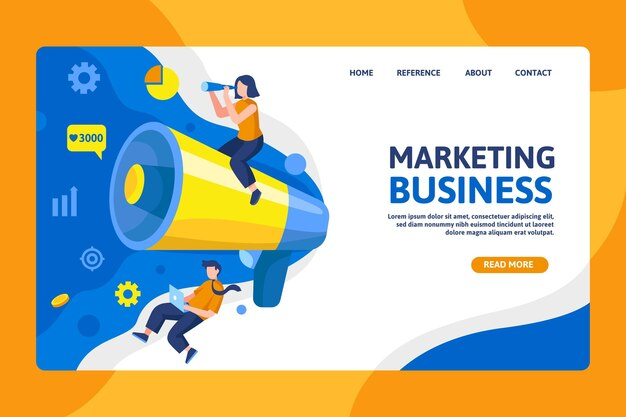

### Import all necessary package for the module

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
import scipy.stats as stats

<b>pandas</b>  :- Pandas library into your Python environment. Pandas is a powerful, open-source library that provides data structures and data analysis tools for working with structured data, particularly in the form of DataFrames and Series.

<b>matplotlib.pyplot</b> :- It supports various kinds of plots: line plots, bar charts, histograms, scatter plots, etc.
                                                                                                          
<b>seaborn</b> :- Seaborn simplifies the process of creating complex visualizations with less code, making it easier for both beginners and experts.

<b>OrdinalEncoder</b> :- Ordinal Encoding is for Ordinal Data: It is critical to use ordinal encoding for categorical variables where the order matters (like education level, customer satisfaction, etc.). For nominal (non-ordered) categorical variables, you should use OneHotEncoder or other encoding techniques.

<b>scipy.stats</b>:-
The scipy.stats module includes a wide variety of statistical tools for hypothesis testing, probability distributions, statistical modeling, etc.
Functions like ttest_ind(), chi2_contingency(), norm(), and many more are available in scipy.stats.


## <U>Steps to perform:</U>

## 1. After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.

In [191]:
#Step 1: Load and Inspect the Data
df = pd.read_csv('marketing_data.csv')
#Display Data Types
print(df.dtypes)
#Display the DataFrame for the first 5 rows
#print(df.head())

#Step 2: Verify and Clean the Income Column
#Convert the Income column to a numeric type after removing any non-numeric characters.
# Clean and convert the Income column
df['Income'] = df['Income'].replace('[\\$,]', '', regex=True).astype(float)

# Step 3: Check if the conversion was successful
print(df['Income'].head())
print(f"Data Type of Income: {df['Income'].dtype}")

#Step 4: Convert the DT_customer to a datatime from object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', errors='coerce')

#Step 5: Verify the conversion of the DT_Customer
print(df['Dt_Customer'].head())
print(f"Data Type of Dt_Customer: {df['Dt_Customer'].dtype}")

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object
0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64
Data Type of Income: float64
0   2014-06-16
1   2014

<B>Note:-</B> As per the inital data DT_Customer and Income fileds are Object data type and Income has "Dollar" sign the above code convert float data type for the Income field and datatime datatype for the DT_Customer filed and replace the $ as empty for the income field.

## 2. There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average.It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.

In [195]:
#Step 1: Display missing income records
print("Missing Income Records:")
print(df[df['Income'].isna()])

#Step 2: Check for unique values in Education and Marital_Status
print("Unique values in Education:", df['Education'].unique())
print("Unique values in Marital_Status:", df['Marital_Status'].unique())

#Step 3: Clean Education and Marital Status Categories
# Standardize categories if necessary
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

#Step 4: Verify corrections of Eduction and Maritical_Status data.
print("Updated Education:", df['Education'].unique())
print("Updated Marital_Status:", df['Marital_Status'].unique())

#Step 5: Impute Missing Values Based on Group Averages # Calculate mean income by Education and Marital_Status
grouped_means = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
# Impute missing values based on group
df['Income'] = df.apply(lambda row: grouped_means[row['Education'], row['Marital_Status']] if pd.isna(row['Income']) else row['Income'], axis=1)

#Step6: Check if missing values are filled
print("Updated Missing Income Records:")
print(df[df['ID'] == 8996])  # Checking one of the previously missing records
#print("8996",df[df['ID'] == 8996])

#Step7: Display missing income records
print("Missing Income Records:")
print(df[df['Income'].isna()])

Missing Income Records:
         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married     NaN        2         1   
262    1994        1983  Graduation        Married     NaN        1         0   
394    3769        1972         PhD       Together     NaN        1         0   
449    5255        1986  Graduation         Single     NaN        1         0   
525    8268        1961         PhD        Married     NaN        0         1   
590   10629        1973    2n Cycle        Married     NaN        1         0   
899   10475        1970      Master       Together     NaN        0         1   
997    9235        1957  Graduation         Single     NaN        1         1   
1096   4345        1964    2n Cycle         Single     NaN        1         1   
1185   7187        1969      Master       Together     NaN        1         1   
1213   8720        1978    2n Cycle       Together     NaN        0         0   
1312

<B>Note:-</B> Eduction data 2nd Cyle convert into "Master" and Marital_Status 'Alone' , 'Absurd' 'YOLO' convert into 'Single' and fill the "NaN" income value, calculate the average 'Income' for each combination of 'Education' and 'Marital_Status' using groupby. Then, you impute missing income values based on these group means. This is done with the apply function where each row gets the average income for its corresponding group if its income is missing. 

## 3.Create variables to represent the total number of children, age, and total spending.
&nbsp;&nbsp;a.
Derive the total purchases from the number of transactions across the three channels.

In [199]:
# Current year for age calculation
current_year = 2024

#Step 1 :- Calculate the Total Number of Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

#Step 2: Calculate Age
df['Age'] = current_year - df['Year_Birth']

#Step 3:- Calculate Total Spending
#df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] 
                        + df['MntSweetProducts'] + df['MntGoldProds'])
#Step 4:- Derive Total Purchases
df['Total_Purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

#Step 5:- Display first few rows of the updated DataFrame
new_calcuated_columns=df[['ID', 'Total_Children', 'Age', 'Total_Spending','Total_Purchases']].head()
print(new_calcuated_columns)

      ID  Total_Children  Age  Total_Spending  Total_Purchases
0   1826               0   54            1190               15
1      1               0   63             577               18
2  10476               1   66             251               11
3   1386               2   57              11                4
4   5371               1   35              91                8


<B>Note:-</B> Calculated the Total_Children,Age,Total_Spending and Total_Purchases and the added into the dataframe.

#  4.Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

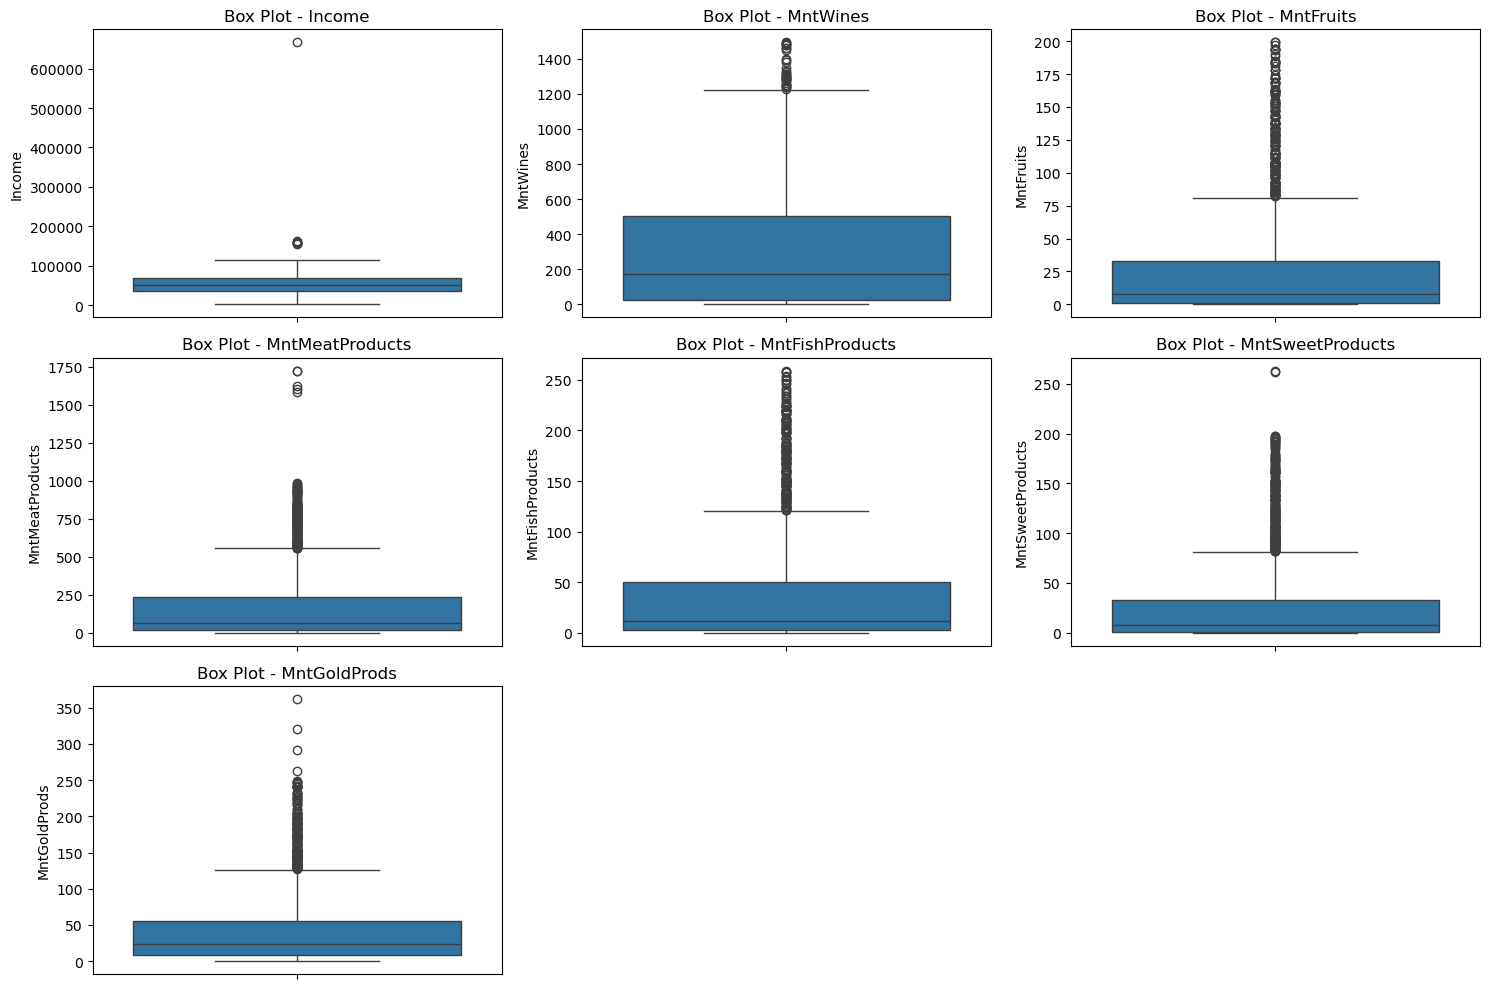

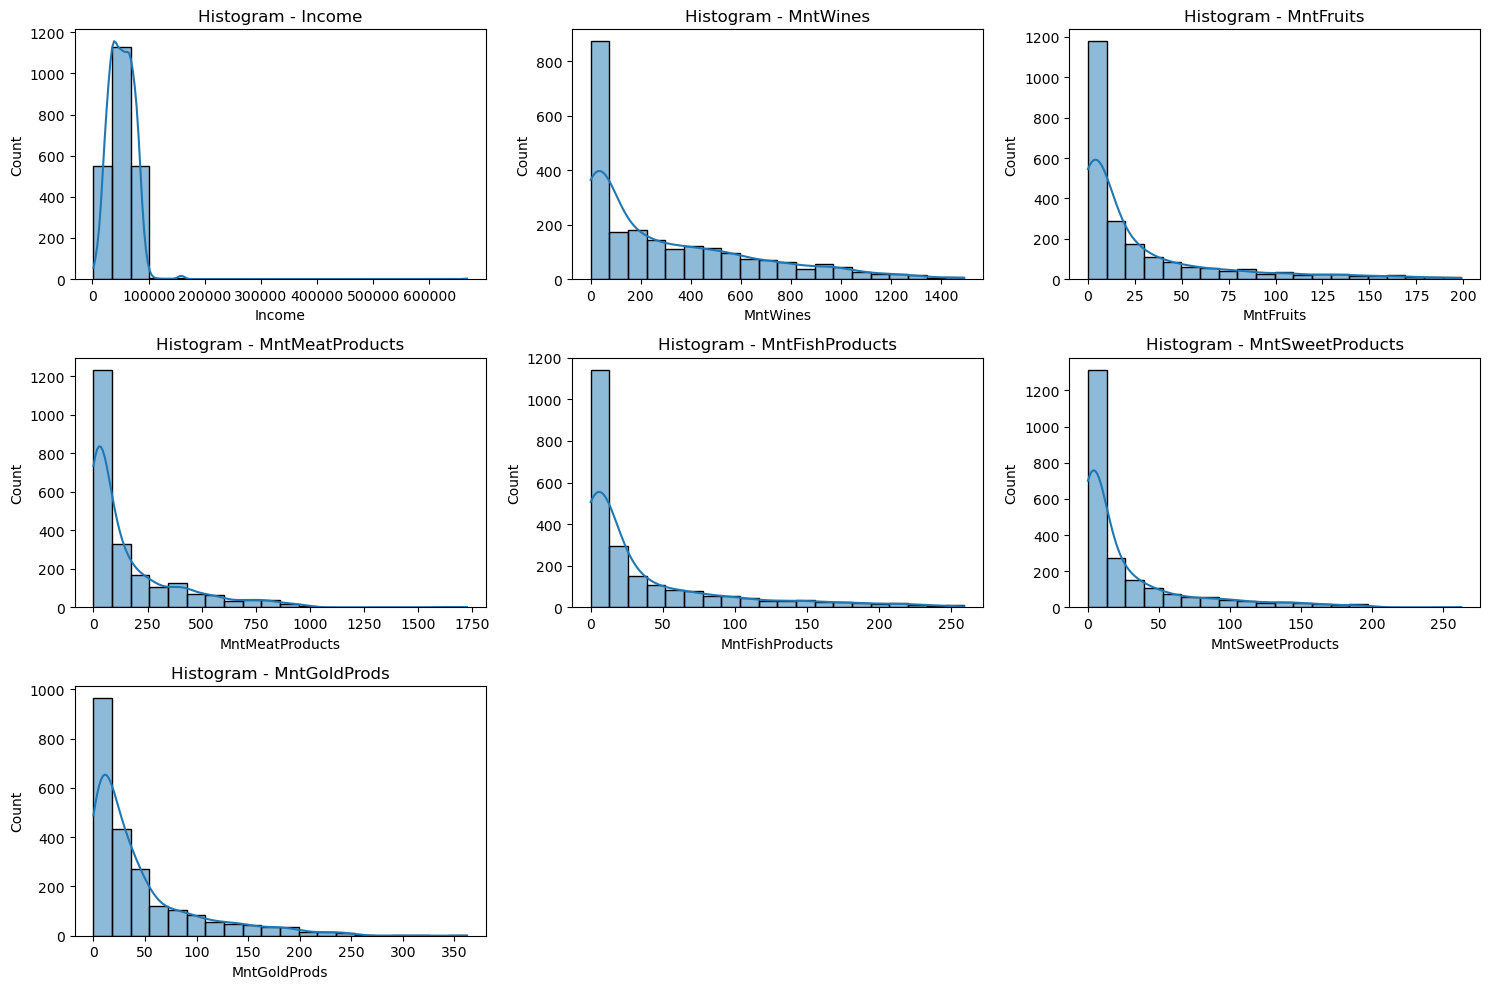

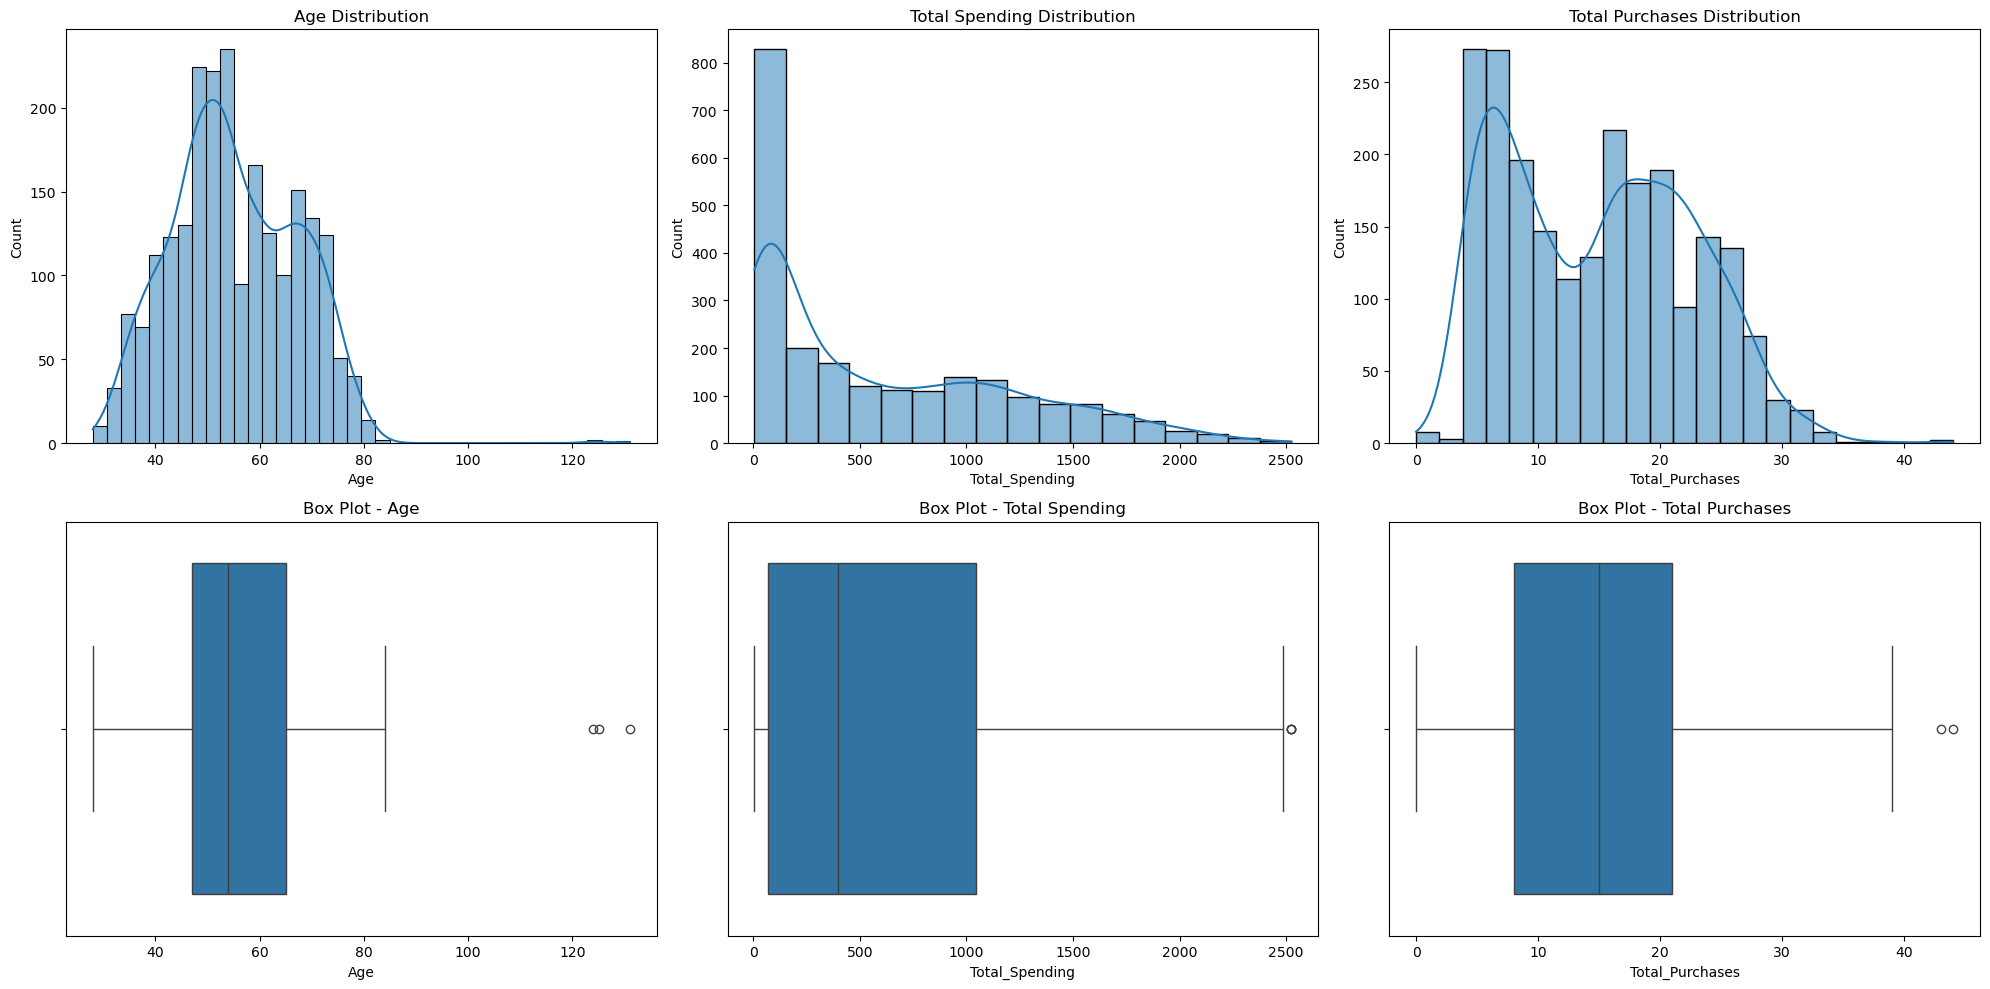

In [202]:
#  Implement outlier treatment as needed.
# Plotting box plots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                            'MntSweetProducts', 'MntGoldProds']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot - {column}')
plt.tight_layout()
plt.show()

# Plotting histograms for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Histogram - {column}')
plt.tight_layout()
plt.show()

# Generate plots to visualize data
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Age Distribution
sns.histplot(df['Age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')
# Total Spending Distribution
sns.histplot(df['Total_Spending'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Total Spending Distribution')
# Total Purchases Distribution
sns.histplot(df['Total_Purchases'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Total Purchases Distribution')
# Boxplots
sns.boxplot(x=df['Age'], ax=axs[1, 0])
axs[1, 0].set_title('Box Plot - Age')

sns.boxplot(x=df['Total_Spending'], ax=axs[1, 1])
axs[1, 1].set_title('Box Plot - Total Spending')

sns.boxplot(x=df['Total_Purchases'], ax=axs[1, 2])
axs[1, 2].set_title('Box Plot - Total Purchases')

plt.tight_layout()
plt.show()

<B>Note:-</B> Generate the Box Plots for Outlier Detection for 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds' <br>
Histograms for Data Distribution: for 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds' <br>
Combined plots for specific features like Age, Total_Spending, and Total_Purchases provide more insight into their distribution and potential outliers.                                                       
                                                          

## 5.Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [204]:
# Ordinal Encoding
edu_order = ['Basic','Graduation', 'Master', 'PhD']

df['Education'] = OrdinalEncoder(categories=[edu_order]).fit_transform(df[['Education']])

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Country'])
print(df_encoded.head())

      ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970        1.0  84835.0        0         0  2014-06-16   
1      1        1961        1.0  57091.0        0         0  2014-06-15   
2  10476        1958        1.0  67267.0        0         1  2014-05-13   
3   1386        1967        1.0  32474.0        1         1  2014-05-11   
4   5371        1989        1.0  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Marital_Status_Together  \
0        0       189        104  ...                    False   
1        0       464          5  ...                    False   
2        0       134         11  ...                    False   
3        0        10          0  ...                     True   
4        0         6         16  ...                    False   

   Marital_Status_Widow  Country_AUS  Country_CA  Country_GER  Country_IND  \
0                 False        False       False        False        False   
1 

<b> Note:-</b>Applied ordinal and one-hot encoding based on the various types of categorical variables.

##  6.Generate a heatmap to illustrate the correlation between different pairs of variables.

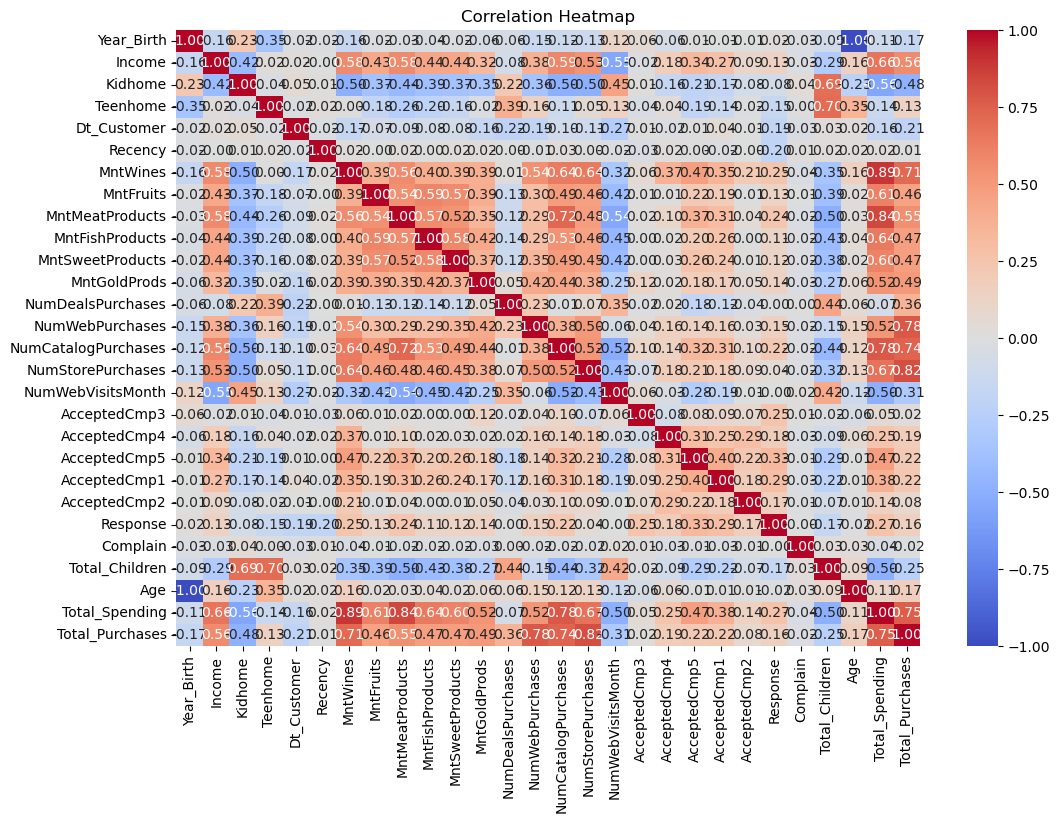

In [206]:
# Drop non-numerical columns
df_numerical = df.drop(['ID', 'Education', 'Marital_Status', 'Country'], axis=1)
#print(df_numerical.head())

# Compute and plot heatmap
corr_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


<b> Note:-</b> The drop function removes non-numerical or irrelevant columns (e.g., identifiers like ID or categorical columns like Education, Marital_Status, Country). and .corr() function computes pairwise correlation coefficients (e.g., Pearson correlation) for all numerical columns in df_numerical.

## 7.Test the following hypotheses:

### a.Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

T-Statistic: -10.648789710009495
P-Value: 7.266393279909732e-26
There is a statistically significant difference between store and non-store purchases for the 56+ age group.


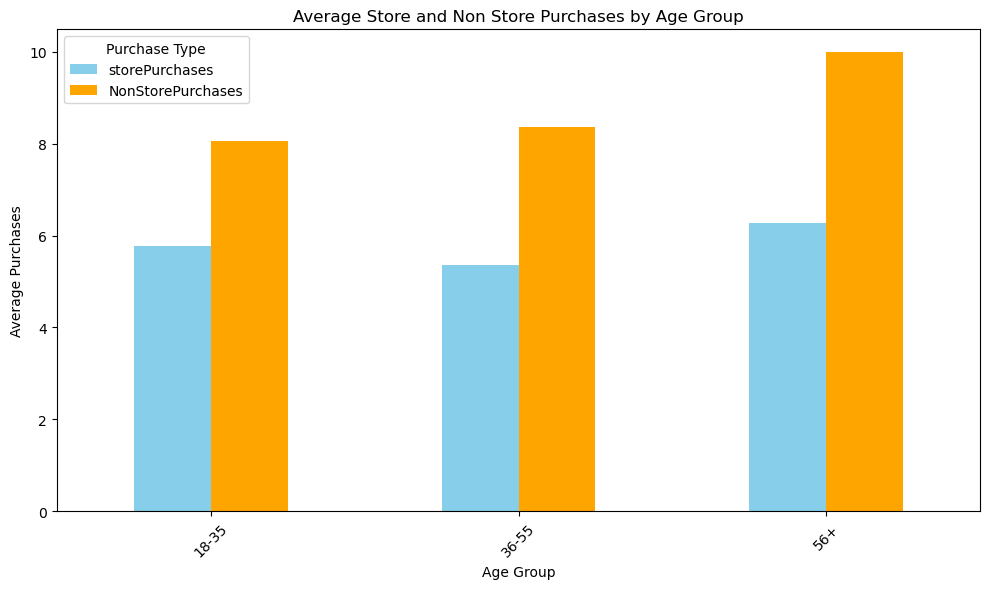

In [208]:
#Step1 :- Create age groups: 18-35, 36-55, 56+
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 35, 55, 100], labels=['18-35', '36-55', '56+'])
#print(df['Age_Group'])

#Step2 :- Find the Non store purchase value.
df['NonStorePurchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'])
df['storePurchases'] = (df['NumStorePurchases'])

#Step3:- Calculate average purchases by age group
age_group_purchases = df.groupby('Age_Group',observed=False)[['storePurchases', 'NonStorePurchases']].mean()

store_purchases_56plus = df[df['Age_Group'] == '56+']['storePurchases']
non_store_purchases_56plus = df[df['Age_Group'] != '56+']['NonStorePurchases']

# Step 4 Perform t-test
t_stat, p_value = ttest_ind(store_purchases_56plus, non_store_purchases_56plus, nan_policy='omit')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between store and non-store purchases for the 56+ age group.")
else:
    print("There is no statistically significant difference between store and non-store purchases for the 56+ age group.")

#Step 5: Correct the plot visualization code
age_group_purchases.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Average Store and Non Store Purchases by Age Group')
plt.ylabel('Average Purchases')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.tight_layout()
plt.show()


<b>Note:-</b>Selecting the groups for comparison:
Identify the two groups: One representing "store purchases" and the other "non-store purchases."
Extract values for comparison based on the specific condition (e.g., age groups).

To perform a T-test (using ttest_ind from scipy.stats) and assess whether there is a statistically significant difference between two groups

After testing all groups, summarize the results (e.g., significant differences) and consider adding annotations to the earlier bar chart to visually indicate where differences are statistically significant

This would indicate a statistically significant difference between store and non-store purchases for the 56+ age group.

### b.Customers with children likely experience time constraints, making online shopping a more convenient option.

8.586142322097379 10.29153605015674 -6.886421656759458 7.406186818631294e-12
There is a statistically significant difference in web purchases between customers with and without children.


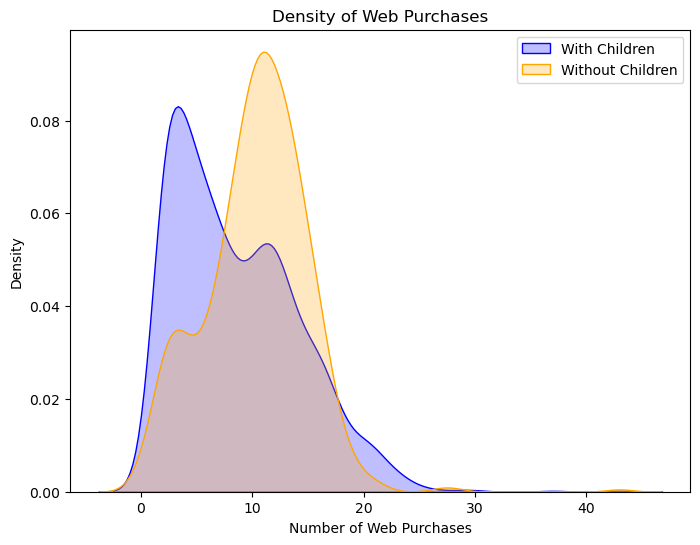

In [210]:
#Step1:- Calculate the web puruchase.
df['WebPurchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'])

# Step2:- Create 'Has_Children' column
df['Has_Children'] = df['Kidhome'] + df['Teenhome'] > 0

# Separate groups
with_children = df[df['Has_Children']]['WebPurchases']
without_children = df[~df['Has_Children']]['WebPurchases']

# Perform t-test
#t_stat, p_value = ttest_ind(with_children, without_children,  nan_policy='omit')
t_stat, p_value = ttest_ind(with_children, without_children, nan_policy='omit')

# Step 3:- Calculate means for both groups
mean_with_children = with_children.mean()
mean_without_children = without_children.mean()
print(mean_with_children, mean_without_children, t_stat, p_value)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in web purchases between customers with and without children.")
else:
    print("There is no statistically significant difference in web purchases between customers with and without children.")
  
#Sep 5:- Kernel Density Estimation (KDE) plots show the probability density of the data.
plt.figure(figsize=(8, 6))
sns.kdeplot(with_children, fill=True, label='With Children', color='blue')
sns.kdeplot(without_children, fill=True, label='Without Children', color='orange')
plt.title('Density of Web Purchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Density')
plt.legend()
plt.show()


<b>Note:-</b>
Calculate the web puruchase,  Identify the 'Has_Children' based on the  Kidhome and Teenhome value. 
Calculate means value of webpucchase for with childen and without children.
Performm the T-test.
Hypothesis test decision:- <BR>
<B>This would indicate a statistically significant difference in web purchases, supporting the hypothesis that customers with children make more online purchases.</B>

### c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

T-test between Store and Deals Purchases: t-stat = 43.3657771323724, p-value = 0.0
Significant difference between Store and Deals Purchases: t-stat = 43.3657771323724, p-value = 0.0
T-test between Store and Web Purchases: t-stat = 18.87264298788038, p-value = 1.662084448614062e-76
Significant difference between Store and Web Purchases: t-stat = 18.87264298788038, p-value = 1.662084448614062e-76
T-test between Store and Catalog Purchases: t-stat = 33.86420465489252, p-value = 5.146655199227271e-224
Significant difference between Store and Catalog Purchases: t-stat = 33.86420465489252, p-value = 5.146655199227271e-224


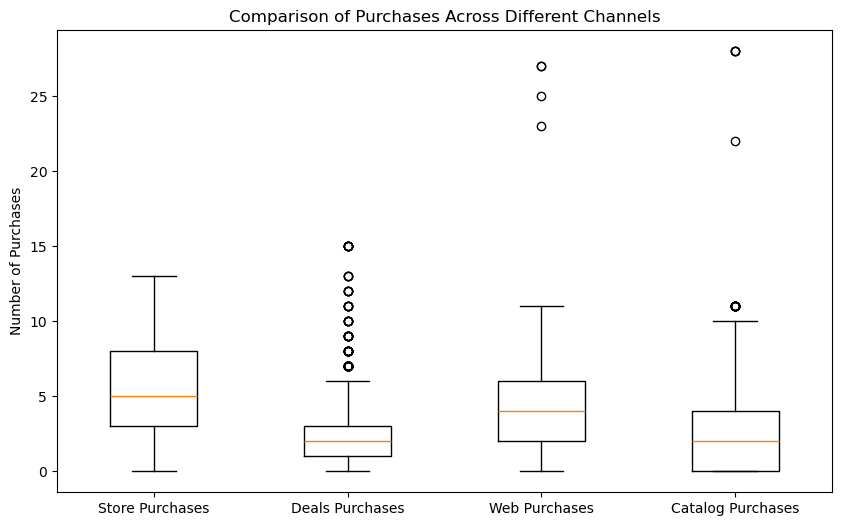

Correlation Matrix:
                      NumDealsPurchases  NumStorePurchases  NumWebPurchases  \
NumDealsPurchases             1.000000           0.068879         0.234185   
NumStorePurchases             0.068879           1.000000         0.502713   
NumWebPurchases               0.234185           0.502713         1.000000   
NumCatalogPurchases          -0.008617           0.518738         0.378376   

                     NumCatalogPurchases  
NumDealsPurchases              -0.008617  
NumStorePurchases               0.518738  
NumWebPurchases                 0.378376  
NumCatalogPurchases             1.000000  


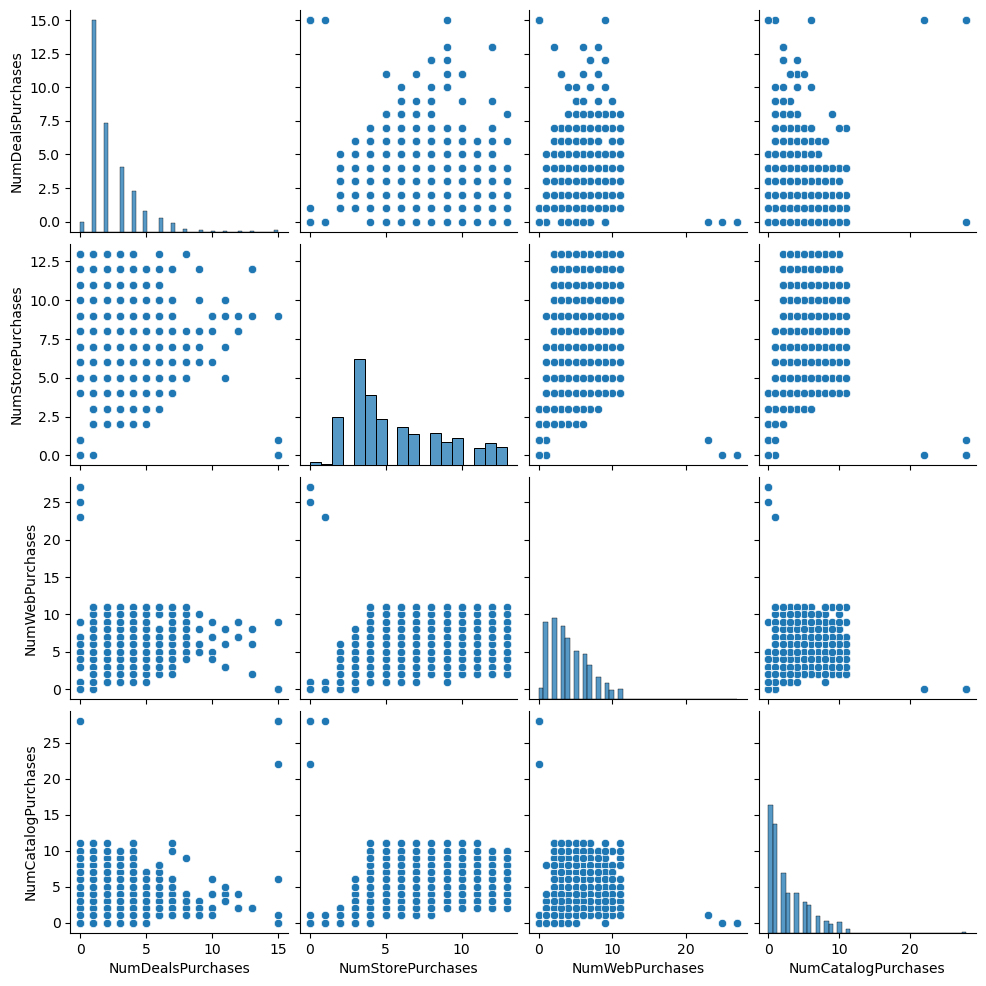

In [212]:
# Two-sample t-test between store purchases and other distribution channels
store_purchases = df['NumStorePurchases']
deals_purchases = df['NumDealsPurchases']
web_purchases = df['NumWebPurchases']
catalog_purchases = df['NumCatalogPurchases']

alpha = 0.05

# Test between Store Purchases and Deals Purchases
t_stat_deals, p_value_deals = stats.ttest_ind(store_purchases, deals_purchases)
print(f"T-test between Store and Deals Purchases: t-stat = {t_stat_deals}, p-value = {p_value_deals}")
if p_value_deals < alpha:
    print(f"Significant difference between Store and Deals Purchases: t-stat = {t_stat_deals}, p-value = {p_value_deals}")
else:
    print(f"No significant difference between Store and Deals Purchases: t-stat = {t_stat_deals}, p-value = {p_value_deals}")

# Test between Store Purchases and Web Purchases
t_stat_web, p_value_web = stats.ttest_ind(store_purchases, web_purchases)
print(f"T-test between Store and Web Purchases: t-stat = {t_stat_web}, p-value = {p_value_web}")
if p_value_web < alpha:
    print(f"Significant difference between Store and Web Purchases: t-stat = {t_stat_web}, p-value = {p_value_web}")
else:
    print(f"No significant difference between Store and Web Purchases: t-stat = {t_stat_web}, p-value = {p_value_web}")


# Test between Store Purchases and Catalog Purchases
t_stat_catalog, p_value_catalog = stats.ttest_ind(store_purchases, catalog_purchases)
print(f"T-test between Store and Catalog Purchases: t-stat = {t_stat_catalog}, p-value = {p_value_catalog}")
if p_value_catalog < alpha:
    print(f"Significant difference between Store and Catalog Purchases: t-stat = {t_stat_catalog}, p-value = {p_value_catalog}")
else:
    print(f"No significant difference between Store and Catalog Purchases: t-stat = {t_stat_catalog}, p-value = {p_value_catalog}")


# Visualizing the distribution of purchases for each channel using boxplots
plt.figure(figsize=(10,6))
plt.boxplot([store_purchases, deals_purchases, web_purchases, catalog_purchases], 
            labels=['Store Purchases', 'Deals Purchases', 'Web Purchases', 'Catalog Purchases'])
plt.title('Comparison of Purchases Across Different Channels')
plt.ylabel('Number of Purchases')
plt.show()

# Correlation matrix to see relationships between store, web, and catalog purchases
correlation_matrix = df[['NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].corr()
print("Correlation Matrix:\n", correlation_matrix)
sns.pairplot(df[['NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']])
plt.show()

<b>Note :- </b>
Find the purchase value of Deals,Web,Catalog and Store and copare store pruchase against all three chanannel.<br>
Test between Store Purchases and Deals Purchases <br>
Test between Store Purchases and Web Purchases <br>
Test between Store Purchases and Catalog Purchases <br>
Correlation matrix to see relationships between store, web, and catalog purchases<br>

<b>Hypothesis test result:-</b>
Significant difference between Store and Deals Purchases: t-stat = 43.3657771323724, p-value = 0.0 <br>
Significant difference between Store and Web Purchases: t-stat = 18.87264298788038, p-value = 1.662084448614062e-76 <br>
Significant difference between Store and Catalog Purchases: t-stat = 33.86420465489252, p-value = 5.146655199227271e-224 <br>


###  d. Does the United States significantly outperform the rest of the world in total purchase volumes?

T-Statistic: 1.7015448173296306
P-Value: 0.09147645042212253
There is no significant difference in total purchase volumes between the U.S. and the rest of the world.


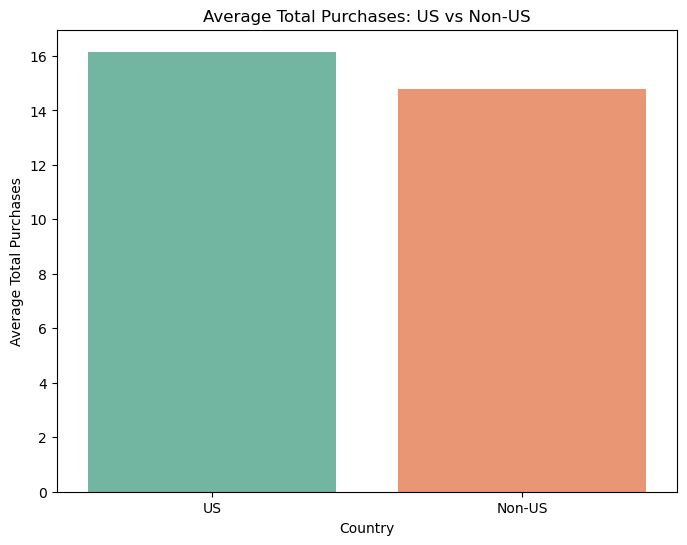

In [214]:
df['Total_Purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

# Separate US and non-US data
us_purchases = df[df['Country'] == 'US']['Total_Purchases']
non_us_purchases = df[df['Country'] != 'US']['Total_Purchases']

# Perform t-test
t_stat, p_value = ttest_ind(us_purchases, non_us_purchases, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decision threshold
alpha = 0.05
if p_value < alpha:
    print("The U.S. significantly outperforms the rest of the world in total purchase volumes.")
else:
    print("There is no significant difference in total purchase volumes between the U.S. and the rest of the world.")

# Calculate average total purchases for US and non-US
avg_purchases = pd.DataFrame({
    'Country': ['US', 'Non-US'],
    'Average_Purchases': [us_purchases.mean(), non_us_purchases.mean()]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='Average_Purchases', data=avg_purchases, hue='Country', palette='Set2' , legend=False)
plt.title('Average Total Purchases: US vs Non-US')
plt.ylabel('Average Total Purchases')
plt.show()


<b>Note :-</b>
Find the total puchase and perform t-test based on the United State and Rest of the United States.<Br>
Performs a t-test to compare the total purchase volumes between the U.S. and non-U.S. customers.<br>
<b>Bar Plot:</b><br>
Shows the average total purchases for U.S. and non-U.S. customers.<br>
Provides a visual representation of the difference between the groups.

## 8.Use appropriate visualization to help analyze the following:

### a.Identify the top-performing products and those with the lowest revenue.

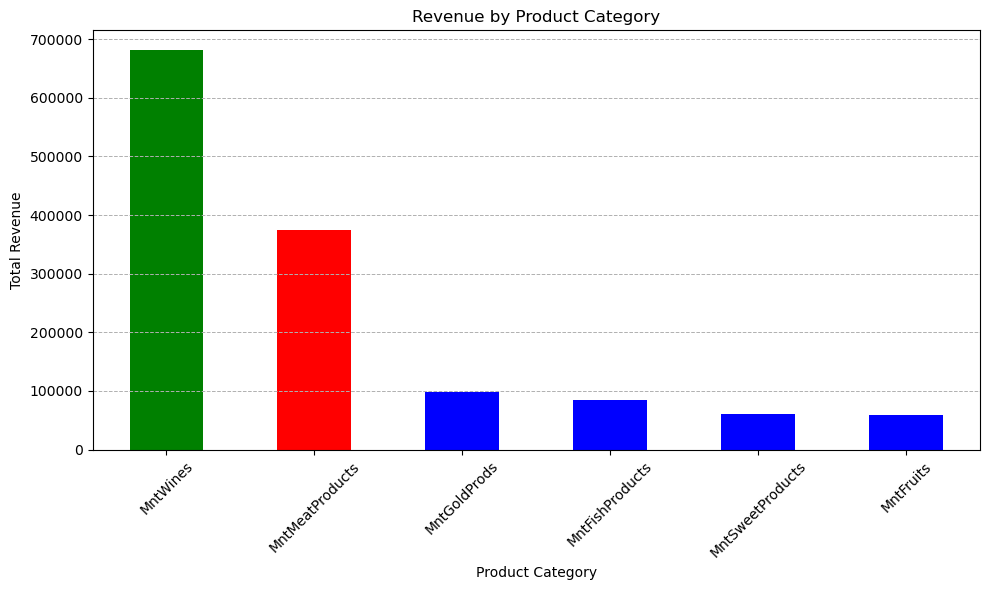

In [216]:
# Calculate total revenue for each product category
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df[product_columns].sum()

# Plotting
plt.figure(figsize=(10, 6))
product_revenue.sort_values(ascending=False).plot(kind='bar', 
                                                  color=['green' if v == product_revenue.max() else 'red'
                                                          if v == product_revenue.min() else 'blue' 
                                                          for v in product_revenue])
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

<B>Note:- </B>
The bar plot will Clearly show the total revenue for each product category, with values labeled above the bars.<br>
Highlight the highest-revenue category (green) and the lowest-revenue category (red).<br>
Provide a legend to explain the color scheme.


### b.Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

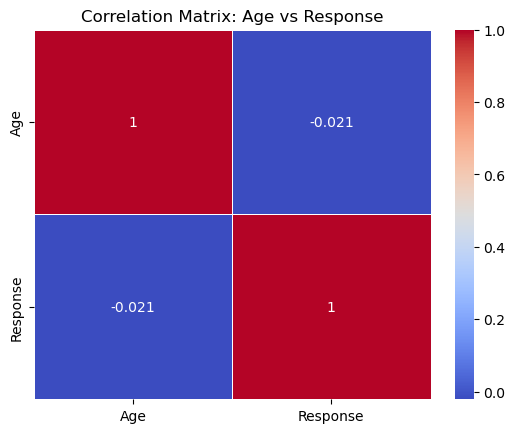

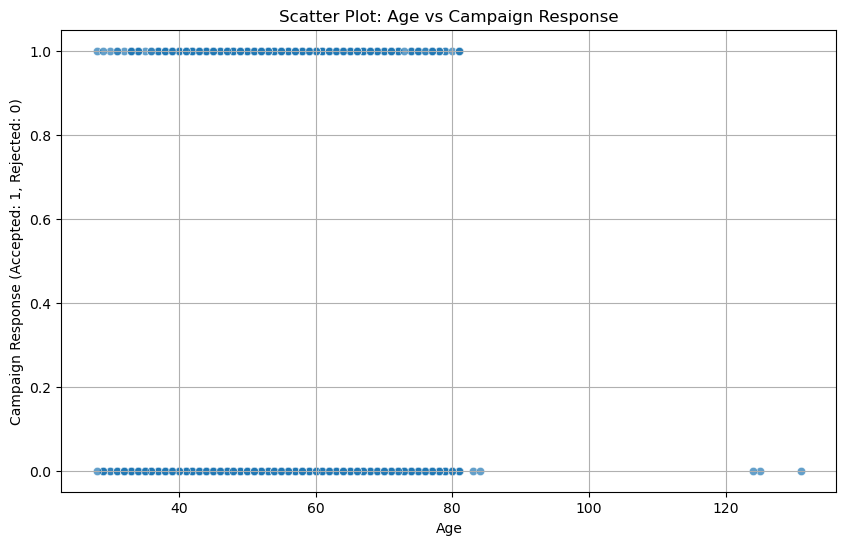

In [218]:
# Step 2: Calculate the correlation matrix between Age and Response
correlation_matrix = df[['Age', 'Response']].corr()
# Step 3: Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Age vs Response")
plt.show()


# Scatter plot: Age vs Response
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Response', data=df, alpha=0.7)
plt.title("Scatter Plot: Age vs Campaign Response")
plt.xlabel("Age")
plt.ylabel("Campaign Response (Accepted: 1, Rejected: 0)")
plt.grid(True)
plt.show()


<b> Note:- </br>

<b>Heatmap:</b><br>
A compact and visually appealing correlation heatmap with clear annotations.<br>
Shows the correlation value (ranging from -1 to 1) between Age and Response.<br>
<b>Scatter Plot:-</b><br>
A clear depiction of the relationship between Age and Response.<br>
If Response is binary (e.g., 0 or 1), the scatter plot will likely show points distributed along horizontal lines at Response = 0 and Response = 1.


### c.Determine the country with the highest number of customers who accepted the last campaign.

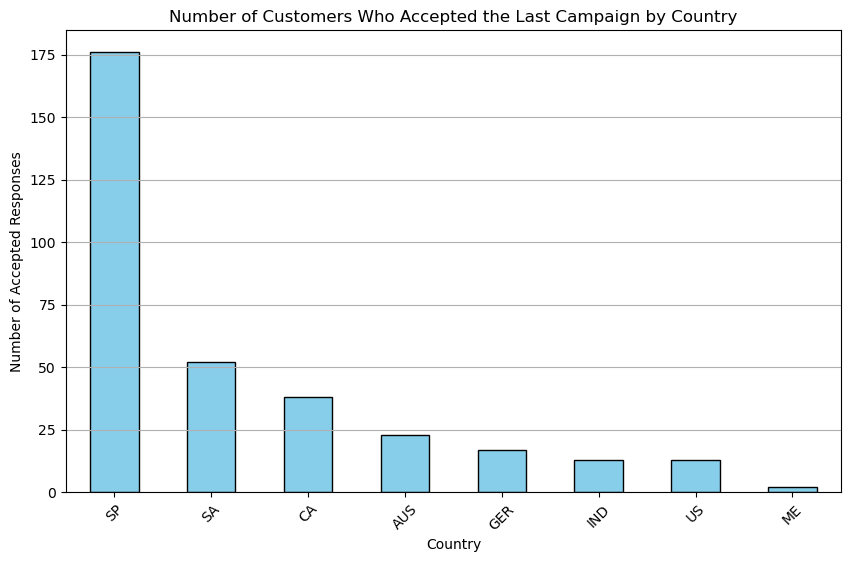

In [220]:
# Filter for customers who accepted the last campaign
accepted_df = df[df['Response'] == 1]

# Group by 'Country' and count the number of accepted responses
country_acceptance = accepted_df['Country'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
country_acceptance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Customers Who Accepted the Last Campaign by Country")
plt.xlabel("Country")
plt.ylabel("Number of Accepted Responses")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<b> Note :-</b>

The bar plot will show the number of customers who accepted the last campaign, with each bar representing a country.<br>
The x-axis will have the countries, and the y-axis will show the number of accepted responses.<br>
The bars will have a sky blue color with black edges to make them stand out.


### d.Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

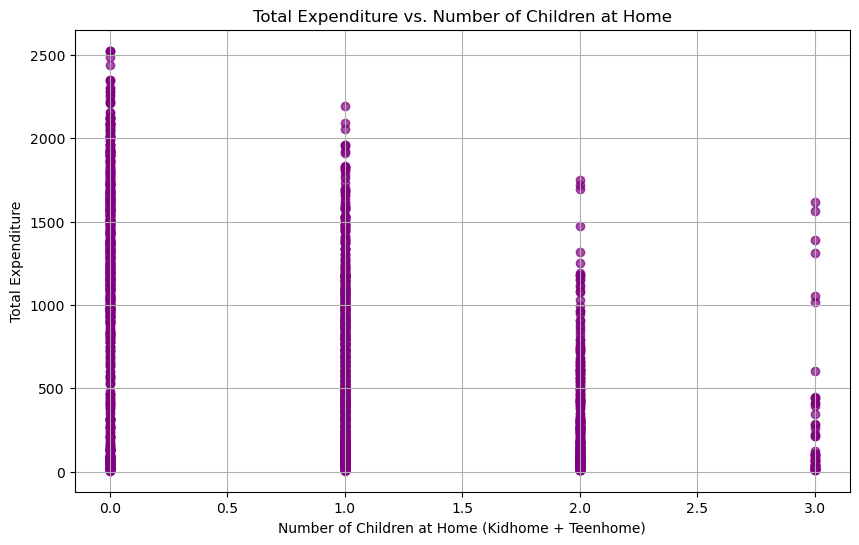

In [222]:
# Calculate total expenditure
df['TotalExpenditure'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate total number of children at home (Kidhome + Teenhome)
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Create a scatter plot to investigate the pattern
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalChildren'], df['TotalExpenditure'], color='purple', alpha=0.7)
plt.title('Total Expenditure vs. Number of Children at Home')
plt.xlabel('Number of Children at Home (Kidhome + Teenhome)')
plt.ylabel('Total Expenditure')
plt.grid(True)
plt.show()

<b> Note:- </b>
Scatter Plot:
The x-axis will represent the total number of children at home (the sum of Kidhome and Teenhome).<br>
The y-axis will represent the total expenditure across various product categories.<br>
Each point will represent an individual customer, with purple markers, and the size/clarity of the markers improved.


### e.Analyze the educational background of customers who lodged complaints in the last two years.

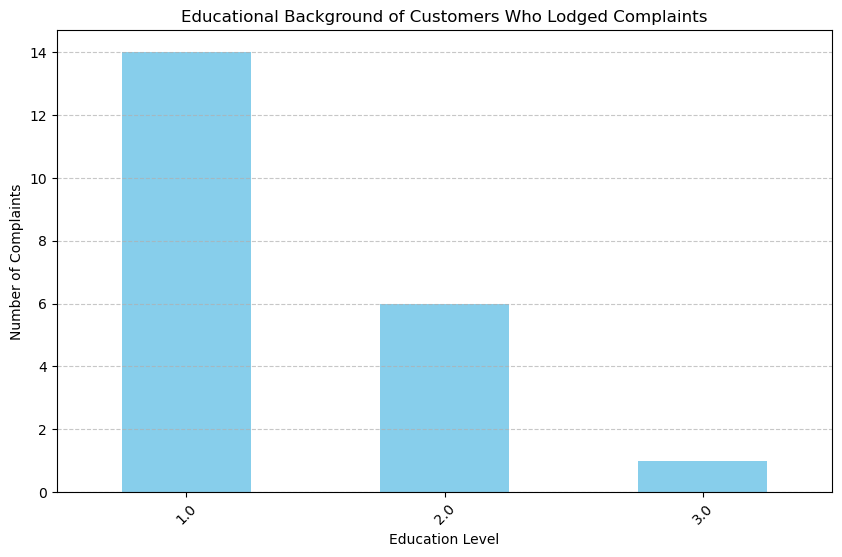

In [224]:
# Filter customers who lodged complaints
complaints_df = df[df['Complain'] == 1]

# Count the number of complaints by education level
education_complaints = complaints_df['Education'].value_counts()

# Plot the distribution of complaints by education level
plt.figure(figsize=(10, 6))
education_complaints.plot(kind='bar', color='skyblue')
plt.title('Educational Background of Customers Who Lodged Complaints')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<b> Note :-</b><br>
<b>Bar Plot:</b><br>
The x-axis will represent the education levels, and the y-axis will show the number of complaints lodged by customers with each education level.<br>
The bars will have a sky-blue color with black edges for better visual clarity.
